In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
IMG_PATH = 'image/'
import cv2
import os

def load_images_from_folder(folder_path):
    images = []
    label_map = {'j' : 0, 's': 1}
    
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return images

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img = cv2.imread(file_path)

            if img is not None:
                try:
                    images.append([img, label_map[filename[0]]])
                except KeyError:
                    print(f"Unknown sample {filename}")
                    pass
            else:
                print(f"Error loading image: {file_path}")

    return images

loaded_images = load_images_from_folder(IMG_PATH)



In [15]:
def classify_sea_jungle(samples):
    confusion_matrix = np.zeros((2, 2))

    for sample in samples:
        img = sample[0]
        actual_label = sample[1]

        green_sum = (img[:, :, 1] / 255).sum()
        blue_sum = (img[:, :, 0] / 255).sum()
        

        # predicting label
        if green_sum > blue_sum:
            predicted_label = 0
            sample.append(predicted_label)
            confusion_matrix[actual_label][predicted_label] += 1

        else:
            predicted_label = 1
            sample.append(predicted_label)
            confusion_matrix[actual_label][predicted_label] += 1

        confidence = abs(green_sum - blue_sum) / max(green_sum, blue_sum)

        sample.append(confidence)

    return samples, confusion_matrix


samples, confusion_matrix = classify_sea_jungle(loaded_images)



In [16]:
confusion_matrix

array([[40.,  2.],
       [ 1., 39.]])

In [17]:
TP = confusion_matrix[0][0]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]
TN = confusion_matrix[1][1]
data_size = TP + FN + FP + TN

accuracy = (TP + TN) / data_size
recall = TP / (TP + FN)
precision = TP / (TP + FP)

print(f"accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}")

accuracy : 0.9634146341463414
precision : 0.975609756097561
recall : 0.9523809523809523


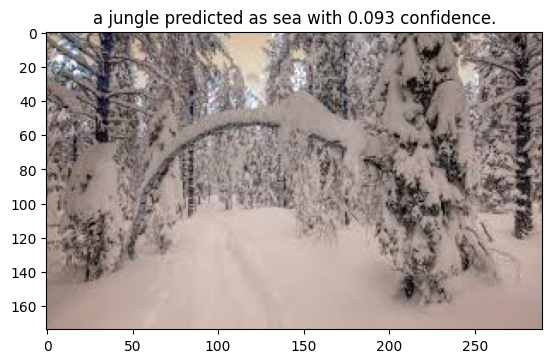

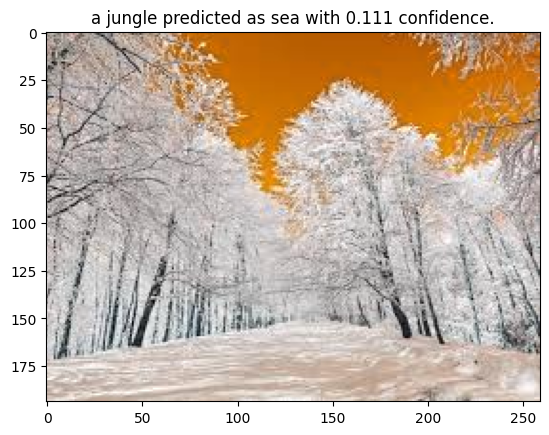

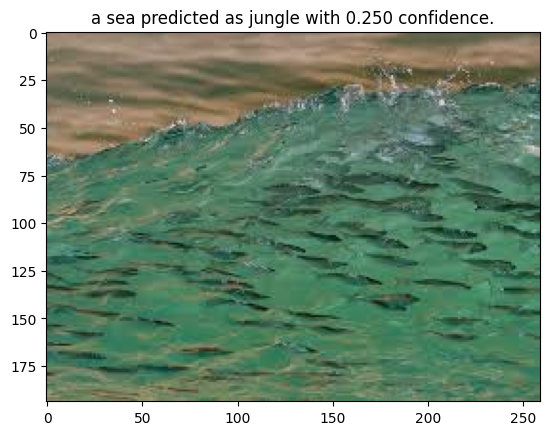

In [18]:
wrong_classified_samples = [sample for sample in samples if sample[1] != sample[2]]

for sample in wrong_classified_samples:
    label_map = {0: 'jungle', 1:'sea'}
    img = sample[0]
    actual_label, predicted_label = label_map[sample[1]], label_map[sample[2]]
    confidence = sample[3]
    
    plt.title(f'a {actual_label} predicted as {predicted_label} with {confidence:.3f} confidence.')
    plt.imshow(sample[0])
    plt.show()